In [1]:
import graphviz 
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


from sklearn import tree

import utils

from utils import local_data
from utils import window
from utils import Scale, give_error

%matplotlib inline
warnings.filterwarnings('ignore')

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
df = pd.read_pickle('./data/sj2_analise.pkl')

In [3]:
df.head()

,vtec,vtec_dt,vtec_dt2,gvtec1,gvtec1_dt,gvtec2,gvtec2_dt,s4
2013-12-01 03:30:00,33.624428,-0.428246,-0.020502,-3.216613,0.002355,1.826065,1.991653,0.163334
2013-12-01 03:40:00,33.205025,-0.546589,-0.118343,-3.122300,0.130198,4.588494,2.530373,0.165397
2013-12-01 03:50:00,32.539631,-0.772594,-0.226005,-2.810556,0.280756,7.786990,2.862830,0.168683
2013-12-01 04:00:00,31.469337,-1.082859,-0.310265,-2.320938,0.399753,10.972091,2.894375,0.173552
2013-12-01 04:10:00,29.995466,-1.429647,-0.346788,-1.764129,0.443303,13.734955,2.621609,0.178917


# Floresta para Regressão
## Completa

In [4]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00110696 -0.00094299 -0.00114878 -0.00117793 -0.00125117 -0.00127477
 -0.00116418 -0.00094361 -0.00113491 -0.00097712] 

O erro quadrático médio foi: 0.001039
O erro quadrático total foi: 1.933914
O maior erro por previsão foi: 0.325619
O erro relativo foi: 7.199496%
O número de verdadeiros negativos foi: 2988
O número de verdadeiros positivos foi: 294
O número de falsos negativos foi: 83
O número de falsos positivos foi: 235
O POD foi: 0.779841
O FAR foi: 0.444234
A ACC foi: 0.911667
O kappa foi: 0.024467

Error for the time series sample:
O erro quadrático médio foi: 0.004875
O erro quadrático total foi: 1.814008
O maior erro por previsão foi: 0.422919
O erro relativo foi: 14.390433%
O número de verdadeiros negativos foi: 511
O número de verdadeiros positivos foi: 74
O número de falsos negativos foi: 10
O número de falsos positivos foi: 80
O POD foi: 0.880952
O FAR foi: 0.519481
A ACC foi: 0.866667
O kappa foi: 0.024209


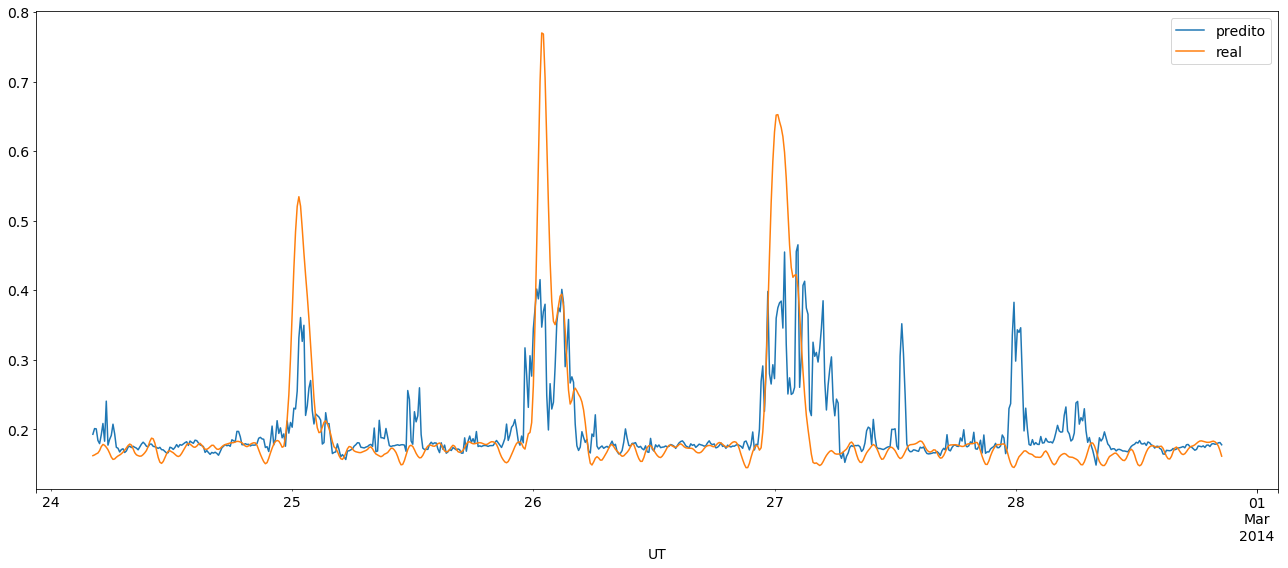

In [5]:
# generate model, use k-fold crossvalidation and print scores
model = RandomForestRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predito'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predito'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(18, 8));
plt.xlabel('UT')
plt.tight_layout()
plt.savefig('./images/regression_random_florest.eps', format='eps', dpi=1000)

## Sem vtec

In [6]:
instances_set = ['vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00129916 -0.00113324 -0.00143118 -0.00151742 -0.00170289 -0.0014669
 -0.00151952 -0.0011143  -0.00148859 -0.00149683] 

O erro quadrático médio foi: 0.001323
O erro quadrático total foi: 2.182732
O maior erro por previsão foi: 0.312920
O erro relativo foi: 8.696800%
O número de verdadeiros negativos foi: 2902
O número de verdadeiros positivos foi: 240
O número de falsos negativos foi: 137
O número de falsos positivos foi: 321
O POD foi: 0.636605
O FAR foi: 0.572193
A ACC foi: 0.872778
O kappa foi: 0.036621

Error for the time series sample:
O erro quadrático médio foi: 0.005622
O erro quadrático total foi: 1.948076
O maior erro por previsão foi: 0.438140
O erro relativo foi: 18.178044%
O número de verdadeiros negativos foi: 469
O número de verdadeiros positivos foi: 70
O número de falsos negativos foi: 14
O número de falsos positivos foi: 122
O POD foi: 0.833333
O FAR foi: 0.635417
A ACC foi: 0.798519
O kappa foi: 0.033154


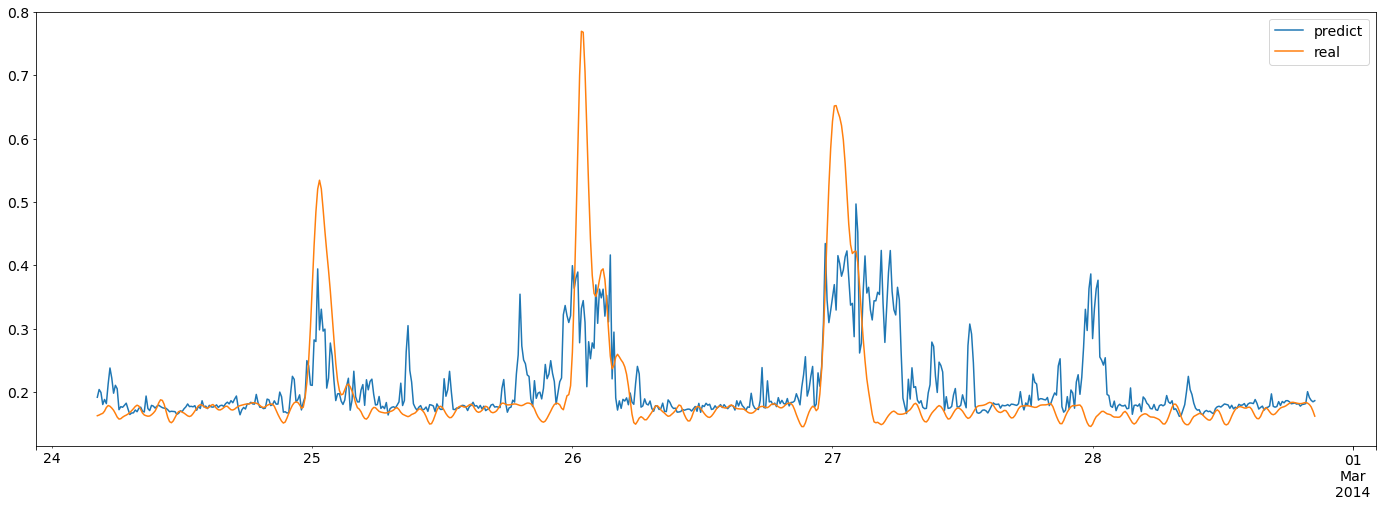

In [7]:
# generate model, use k-fold crossvalidation and print scores
model = RandomForestRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem derivada temporal primeira do VTEC

In [8]:
instances_set = ['vtec', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00114355 -0.00087494 -0.00123268 -0.00112876 -0.00129081 -0.00136287
 -0.00125055 -0.00102595 -0.00106335 -0.0011706 ] 

O erro quadrático médio foi: 0.001052
O erro quadrático total foi: 1.946181
O maior erro por previsão foi: 0.281296
O erro relativo foi: 7.552509%
O número de verdadeiros negativos foi: 2979
O número de verdadeiros positivos foi: 290
O número de falsos negativos foi: 87
O número de falsos positivos foi: 244
O POD foi: 0.769231
O FAR foi: 0.456929
A ACC foi: 0.908056
O kappa foi: 0.025458

Error for the time series sample:
O erro quadrático médio foi: 0.004963
O erro quadrático total foi: 1.830338
O maior erro por previsão foi: 0.433460
O erro relativo foi: 14.689184%
O número de verdadeiros negativos foi: 513
O número de verdadeiros positivos foi: 74
O número de falsos negativos foi: 10
O número de falsos positivos foi: 78
O POD foi: 0.880952
O FAR foi: 0.513158
A ACC foi: 0.869630
O kappa foi: 0.023928


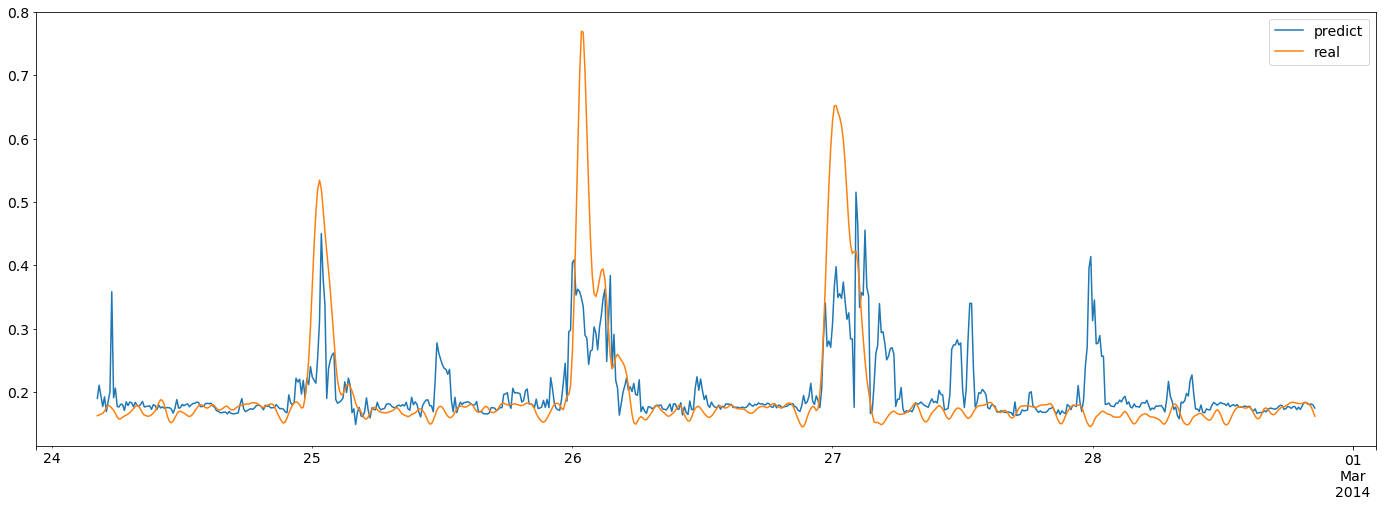

In [9]:
# generate model, use k-fold crossvalidation and print scores
model = RandomForestRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem derivada temporal segunda do VTEC

In [10]:
instances_set = ['vtec', 'vtec_dt', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00100232 -0.00091319 -0.0011995  -0.00121994 -0.00132927 -0.00118273
 -0.00116926 -0.00093439 -0.00121452 -0.00117061] 

O erro quadrático médio foi: 0.001039
O erro quadrático total foi: 1.933789
O maior erro por previsão foi: 0.328270
O erro relativo foi: 7.226479%
O número de verdadeiros negativos foi: 2973
O número de verdadeiros positivos foi: 304
O número de falsos negativos foi: 73
O número de falsos positivos foi: 250
O POD foi: 0.806366
O FAR foi: 0.451264
A ACC foi: 0.910278
O kappa foi: 0.022610

Error for the time series sample:
O erro quadrático médio foi: 0.004913
O erro quadrático total foi: 1.820977
O maior erro por previsão foi: 0.465894
O erro relativo foi: 15.168037%
O número de verdadeiros negativos foi: 496
O número de verdadeiros positivos foi: 74
O número de falsos negativos foi: 10
O número de falsos positivos foi: 95
O POD foi: 0.880952
O FAR foi: 0.562130
A ACC foi: 0.844444
O kappa foi: 0.026316


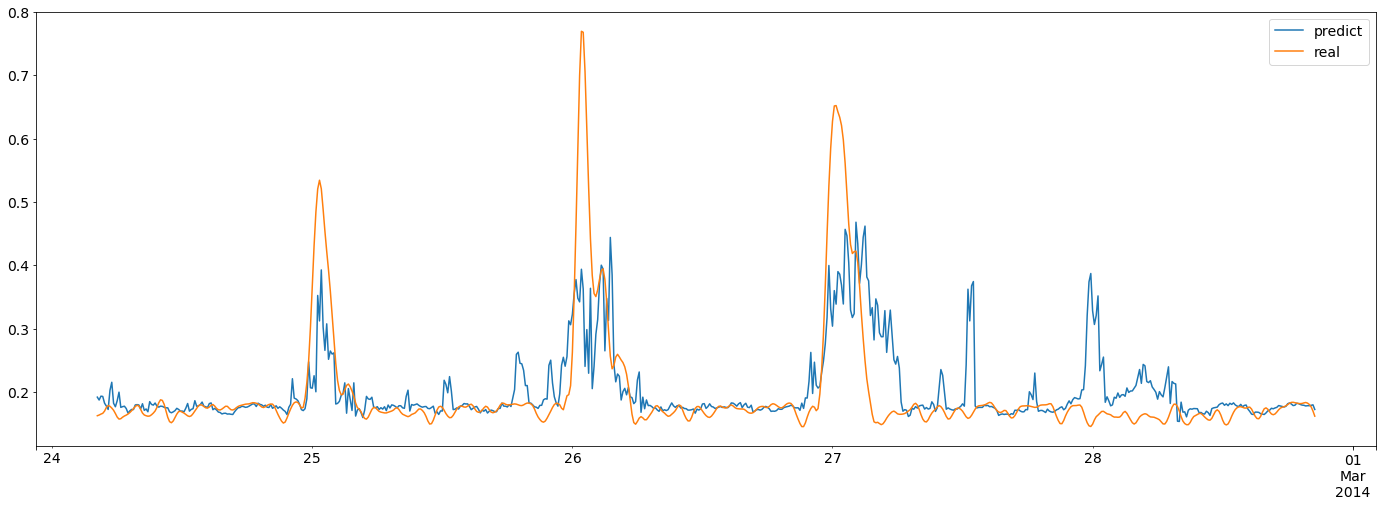

In [11]:
# generate model, use k-fold crossvalidation and print scores
model = RandomForestRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem gradiente do VTEC em relação à Pirassununga

In [12]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.0012654  -0.00100034 -0.00141524 -0.00135078 -0.00116147 -0.0013928
 -0.00120682 -0.00109627 -0.00116016 -0.00137902] 

O erro quadrático médio foi: 0.001156
O erro quadrático total foi: 2.040100
O maior erro por previsão foi: 0.325387
O erro relativo foi: 7.712624%
O número de verdadeiros negativos foi: 2950
O número de verdadeiros positivos foi: 288
O número de falsos negativos foi: 89
O número de falsos positivos foi: 273
O POD foi: 0.763926
O FAR foi: 0.486631
A ACC foi: 0.899444
O kappa foi: 0.026325

Error for the time series sample:
O erro quadrático médio foi: 0.005818
O erro quadrático total foi: 1.981633
O maior erro por previsão foi: 0.513481
O erro relativo foi: 16.172968%
O número de verdadeiros negativos foi: 484
O número de verdadeiros positivos foi: 68
O número de falsos negativos foi: 16
O número de falsos positivos foi: 107
O POD foi: 0.809524
O FAR foi: 0.611429
A ACC foi: 0.817778
O kappa foi: 0.032966


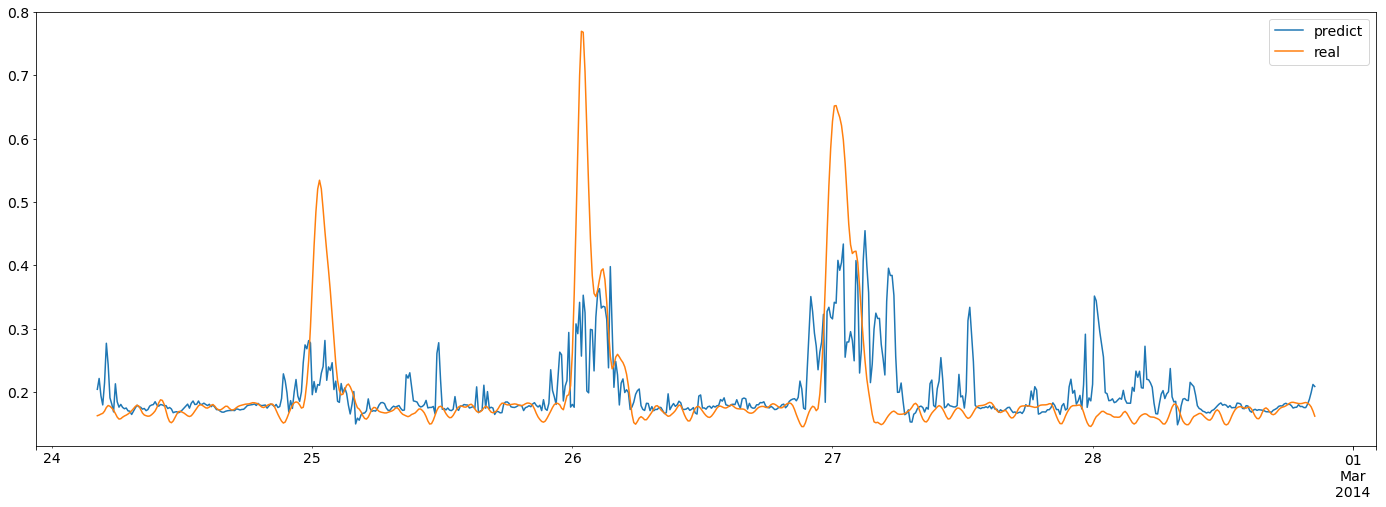

In [13]:
# generate model, use k-fold crossvalidation and print scores
model = RandomForestRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem derivada temporal do gradiente do VTEC em relação à Pirassununga

In [14]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.0010416  -0.0009636  -0.00118199 -0.00122706 -0.00120009 -0.00128911
 -0.0012712  -0.00096414 -0.00145236 -0.00102329] 

O erro quadrático médio foi: 0.001061
O erro quadrático total foi: 1.953972
O maior erro por previsão foi: 0.387941
O erro relativo foi: 7.382340%
O número de verdadeiros negativos foi: 2981
O número de verdadeiros positivos foi: 311
O número de falsos negativos foi: 66
O número de falsos positivos foi: 242
O POD foi: 0.824934
O FAR foi: 0.437613
A ACC foi: 0.914444
O kappa foi: 0.020988

Error for the time series sample:
O erro quadrático médio foi: 0.005341
O erro quadrático total foi: 1.898800
O maior erro por previsão foi: 0.491942
O erro relativo foi: 13.666522%
O número de verdadeiros negativos foi: 522
O número de verdadeiros positivos foi: 71
O número de falsos negativos foi: 13
O número de falsos positivos foi: 69
O POD foi: 0.845238
O FAR foi: 0.492857
A ACC foi: 0.878519
O kappa foi: 0.025646


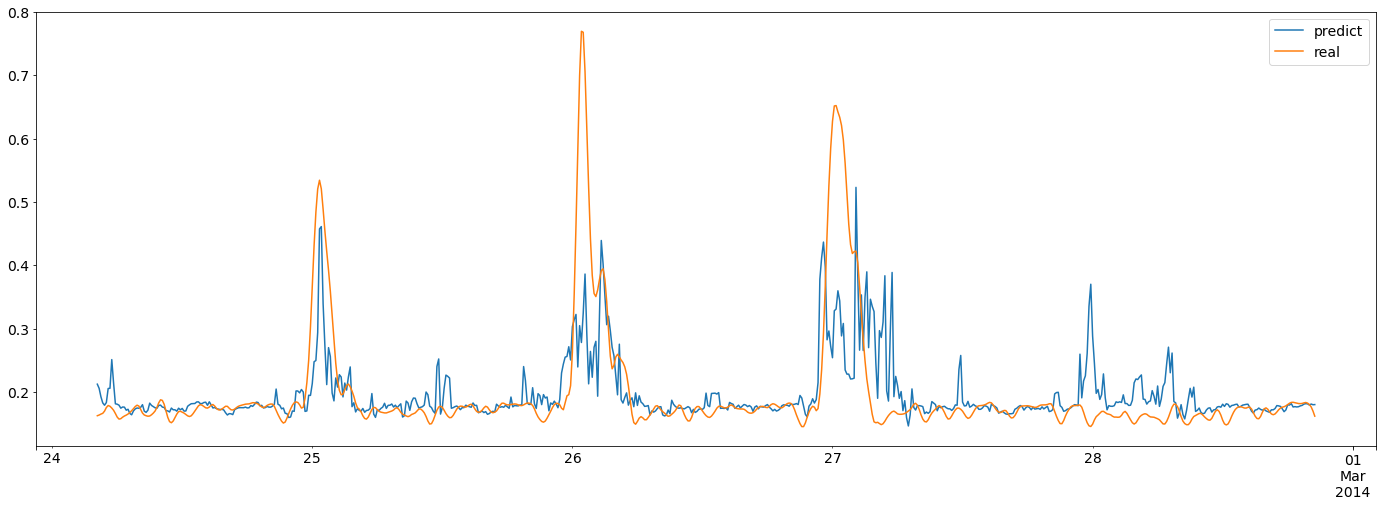

In [15]:
# generate model, use k-fold crossvalidation and print scores
model = RandomForestRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem gradiente do VTEC em relação à Brasília

In [16]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00122146 -0.00098786 -0.00139602 -0.00152213 -0.00148077 -0.00173014
 -0.00126733 -0.00102516 -0.00117856 -0.00125051] 

O erro quadrático médio foi: 0.001237
O erro quadrático total foi: 2.110535
O maior erro por previsão foi: 0.305884
O erro relativo foi: 8.043304%
O número de verdadeiros negativos foi: 2923
O número de verdadeiros positivos foi: 286
O número de falsos negativos foi: 91
O número de falsos positivos foi: 300
O POD foi: 0.758621
O FAR foi: 0.511945
A ACC foi: 0.891389
O kappa foi: 0.027145

Error for the time series sample:
O erro quadrático médio foi: 0.005567
O erro quadrático total foi: 1.938442
O maior erro por previsão foi: 0.503238
O erro relativo foi: 15.886816%
O número de verdadeiros negativos foi: 479
O número de verdadeiros positivos foi: 71
O número de falsos negativos foi: 13
O número de falsos positivos foi: 112
O POD foi: 0.845238
O FAR foi: 0.612022
A ACC foi: 0.814815
O kappa foi: 0.031120


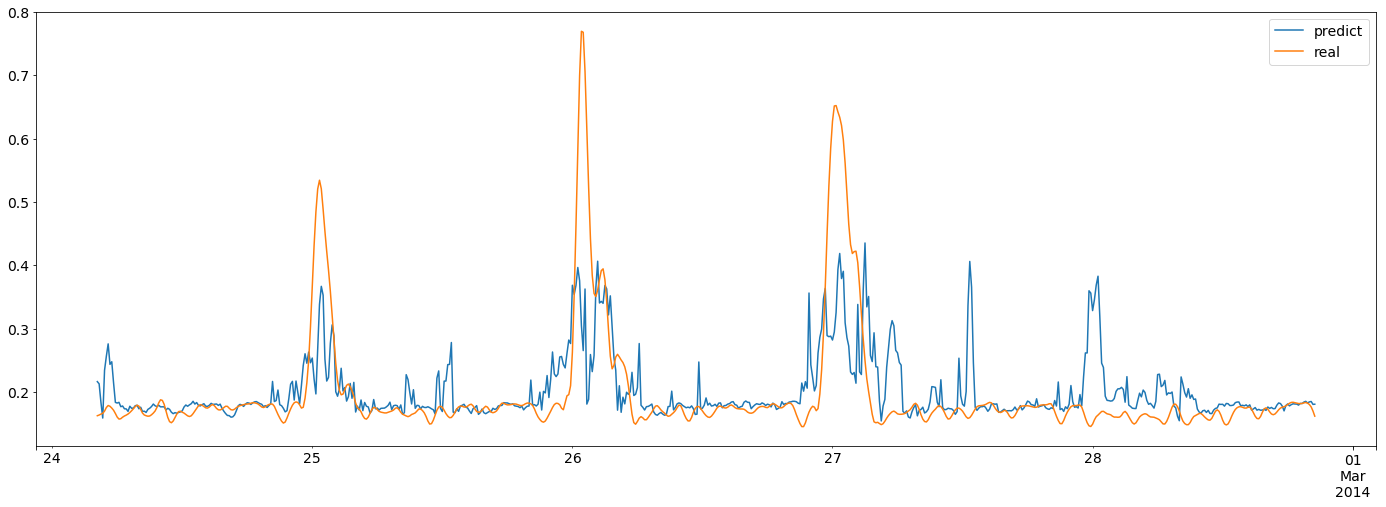

In [17]:
# generate model, use k-fold crossvalidation and print scores
model = RandomForestRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem derivada temporal do gradiente do VTEC em relação à Brasília

In [18]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00114937 -0.00093759 -0.00133282 -0.00127419 -0.00120702 -0.00137066
 -0.00140872 -0.00099645 -0.0010615  -0.00104521] 

O erro quadrático médio foi: 0.001071
O erro quadrático total foi: 1.963492
O maior erro por previsão foi: 0.327594
O erro relativo foi: 7.262591%
O número de verdadeiros negativos foi: 2968
O número de verdadeiros positivos foi: 306
O número de falsos negativos foi: 71
O número de falsos positivos foi: 255
O POD foi: 0.811671
O FAR foi: 0.454545
A ACC foi: 0.909444
O kappa foi: 0.022281

Error for the time series sample:
O erro quadrático médio foi: 0.005894
O erro quadrático total foi: 1.994604
O maior erro por previsão foi: 0.500018
O erro relativo foi: 15.761442%
O número de verdadeiros negativos foi: 498
O número de verdadeiros positivos foi: 70
O número de falsos negativos foi: 14
O número de falsos positivos foi: 93
O POD foi: 0.833333
O FAR foi: 0.570552
A ACC foi: 0.841481
O kappa foi: 0.029590


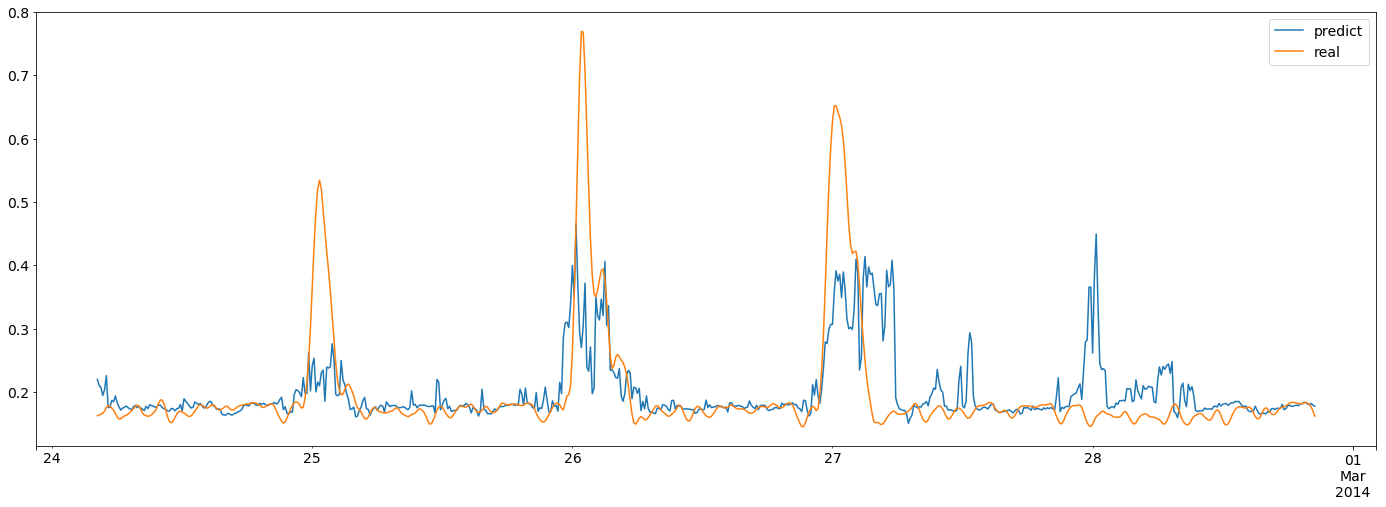

In [19]:
# generate model, use k-fold crossvalidation and print scores
model = RandomForestRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));